In [2]:
import math
import cairo
import matplotlib.pyplot as plt

from notefreqs import get_notes_info

from io import BytesIO
import IPython.display

In [3]:
notes_info = get_notes_info()

interval_names = ['I','ii','II','iii','III','IV','v','V','vi','VI','vii','VII','I\'']

for k, d in notes_info.items():
    ratios_str = ", ".join([f"{num}/{den}" for num, den, freq, err, conc in d['ratio']])
    print(f"{d['name']} ({interval_names[d['interval']]}): midi={d['midi']}, freq={d['freq']:.2f} Hz, ratios=[{ratios_str}]")

    cent_err_str = ", ".join([f"{err:.1f} ({num}/{den})" for num, den, freq, err, conc in d['ratio']])
    print(f"{d['name']} ({interval_names[d['interval']]}): error={cent_err_str}]")

    concordance_str = ", ".join([f"{conc * 100:.1f}% ({num}/{den})" for num, den, freq, err, conc in d['ratio']])
    print(f"{d['name']} ({interval_names[d['interval']]}): concordance={concordance_str}]")

A4 (I): midi=69, freq=440.00 Hz, ratios=[1/1]
A4 (I): error=0.0 (1/1)]
A4 (I): concordance=100.0% (1/1)]
B4b/A4# (ii): midi=70, freq=466.16 Hz, ratios=[15/14, 16/15, 17/16, 18/17]
B4b/A4# (ii): error=19.4 (15/14), 11.7 (16/15), 5.0 (17/16), 1.0 (18/17)]
B4b/A4# (ii): concordance=13.3% (15/14), 12.5% (16/15), 11.8% (17/16), 11.1% (18/17)]
B4 (II): midi=71, freq=493.88 Hz, ratios=[9/8, 10/9, 17/15, 19/17]
B4 (II): error=3.9 (9/8), 17.6 (10/9), 16.7 (17/15), 7.4 (19/17)]
B4 (II): concordance=22.2% (9/8), 20.0% (10/9), 12.2% (17/15), 10.8% (19/17)]
C4 (iii): midi=72, freq=523.25 Hz, ratios=[6/5, 13/11, 19/16, 20/17]
C4 (iii): error=15.6 (6/5), 10.8 (13/11), 2.5 (19/16), 18.6 (20/17)]
C4 (iii): concordance=33.3% (6/5), 16.1% (13/11), 11.2% (19/16), 10.6% (20/17)]
D4b/C4# (III): midi=73, freq=554.37 Hz, ratios=[5/4, 14/11, 19/15]
D4b/C4# (III): error=13.7 (5/4), 17.5 (14/11), 9.2 (19/15)]
D4b/C4# (III): concordance=40.0% (5/4), 15.6% (14/11), 11.6% (19/15)]
D4 (IV): midi=74, freq=587.33 Hz, 

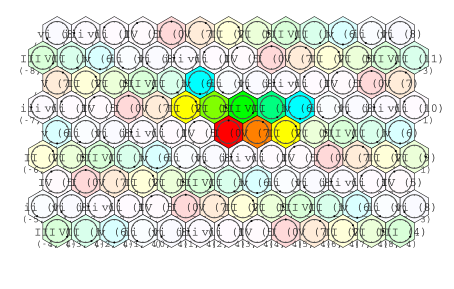

In [4]:
from HexagonalLayoutPic import HexagonalLayoutPic

hexa_pic = HexagonalLayoutPic(D=33)

with BytesIO() as svgio:
    surface = cairo.SVGSurface(svgio, hexa_pic.width, hexa_pic.height)
    ctx = cairo.Context(surface)

    hexa_pic.draw_pic(ctx)

    pngio = BytesIO()
    surface.write_to_png(pngio)

    ctx.save()
    surface.finish()
    svg_data = svgio.getvalue()

#print(svg_data)
IPython.display.SVG(data=svg_data)
#IPython.display.Image(data=pngio.getvalue())


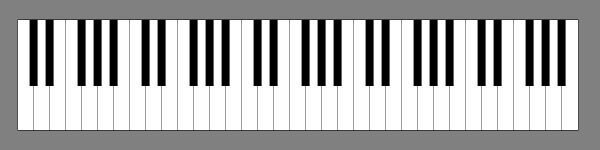

In [5]:
from PianoOctavePic import PianoOctavePic
piano_pic = PianoOctavePic(width=600, height=150, num_octaves=5)
with BytesIO() as svgio:
    surface = cairo.SVGSurface(svgio, piano_pic.width, piano_pic.height)
    ctx = cairo.Context(surface)

    piano_pic.draw_pic(ctx)

    pngio = BytesIO()
    surface.write_to_png(pngio)

    ctx.save()
    surface.finish()
    svg_data = svgio.getvalue()

#print(svg_data)
IPython.display.SVG(data=svg_data)
#IPython.display.Image(data=pngio.getvalue())